In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 7

Consider finding the real solutions to quadratic equations of the form $$x^2 + 2px - q = 0,$$ the solutions of which are obviously given by $$x_\pm = -p \pm \sqrt{p^2 + q}.$$

Implement functions `x_plus` and `x_minus`, computing the two solutions to the quadratic equation, given $p$ and $q$.

In [2]:
def x_plus(p, q):
    return -p + np.sqrt(p*p + q)

def x_minus(p, q):
    return -p - np.sqrt(p*p + q)

### Q7 (a)

Consider first how sensitive the two solutions are when changing $p$, to measure the relative change of the answer $|\delta x| / |x|$, divided by the relative change of the datum $p$, $$R_+(p, \delta p) = \frac{|\delta x_+| / |x_+|}{|\delta p| / |p|},$$ and separately the same for $x_-$.

Take a perturbation $\delta p = 10^{-3}$ and compute, for $p = -1$ as well as $p = 1$, for $q = 1$, the quantities $R_+$ and $R_-$. These quantities signify the sensitivity of the answer when changing the input ($p$ in this case). Comment on your observations and their implications.

In [3]:
# Implementation details for R_plus and R_minus, generic over branch function
def _R(p, delta_p, q, branch):
    x = branch(p, q)
    delta_x = branch(p + delta_p, q)

    change_x_p = np.abs(delta_x) / np.abs(x)
    change_p = np.abs(delta_p) / np.abs(p)

    return change_x_p / change_p

def R_plus(p, delta_p, q):
    return _R(p, delta_p, q, x_plus)

def R_minus(p, delta_p, q):
    return _R(p, delta_p, q, x_minus)

delta_p = 10**-3

print("For p=1, q=1:")
print(f"R_+ = {R_plus(1, delta_p, 1)}")
print(f"R_- = {R_minus(1, delta_p, 1)}\n")

print("For p=-1, q=1:")
print(f"R_+ = {R_plus(-1, delta_p, 1)}")
print(f"R_- = {R_minus(-1, delta_p, 1)}")

For p=1, q=1:
R_+ = 999.2933197822003
R_- = 1000.7071799678932

For p=-1, q=1:
R_+ = 999.2929664787437
R_- = 1000.70753377135


TODO: Comment

### Q7 (b)

Now plot $R_+(p, \delta p)$ for $\delta p = 10^{-3}$ and $p \in [-1, 1]$, and the same for $R_-$ in a separate plot. Into each of these figures, also plot the anlytical condition numbers $K(p)$ computed in **Q4 (a)**.

Comment on your observation and comparison. Remember to explain your code and comment on the observed result.

In [4]:
# TODO: Plot

TODO: Comment

### Q7 (c)

Do the same for $q$: Compute the relative change $|\delta x| / |x|$ divided by the relative change of the datum, $|\delta q| / |q|$, for $p = 1$, $\delta p = 10^{-3]$, for $q = -1$ as well as $q = 1$.

In [5]:
# TODO: Compute R for q

### Q7 (d)

Now, for $p = 1$ and $\delta q = 10^{-3}$, plot the numerically measured senstivity for $q \in [-1, 1]$. Again, plot this for both solutions separately, and compare each against the condition number $K(q)$. Again, comment on your observation and comparison.

In [6]:
# TODO: Plot

TODO: Comment

# Question 8

Implement a function `linear_interpolate` which takes a function $f(x)$, two nodes $x_0$ and $x_1$, and a position $x$, and returns its linear interpolant $p_1(x)$ evaluated at $x$.

This function should allow you to evaluate the linear interpolant of an arbitrary function and with aribtrary nodes at any point $x$.

In [7]:
def linear_interpolate(f, x_0, x_1, x):
    # Taken from page 20 of the notes
    return f(x_0) + ((f(x_1) - f(x_0)) / (x_1 - x_0)) * (x - x_0)

### Q8 (a)

Evaluate the linear interpolant $p_1(x)$ for the nodes $x_0 = 0$, $x_1 = 1$ for the function $f(x) = 2 \sin(2x)$ at the location $x = 0.75$.

In [8]:
# Using a lambda avoids cluttering the namespace
linear_interpolate(lambda x: 2*np.sin(2*x), 0, 1, 0.75)

np.float64(1.3639461402385225)

### Q8 (b)

Plot the function $f(x) = \sin(x)$ on the interval $x \in [0, 1]$ and its linear interpolant $p_1(x)$ for the nodes $x_0 = 0$, $x_1 = 1$ on the same interval, and interpret your result.

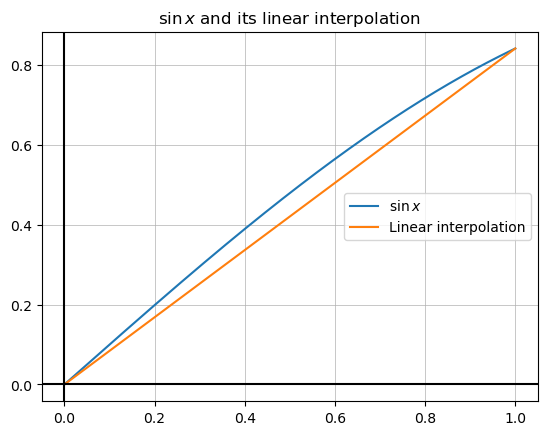

In [9]:
x = np.linspace(0, 1, 5000)
y = np.sin(x)
lerp_y = linear_interpolate(np.sin, 0, 1, x)

plt.plot(x, y, label=r"$\sin x$")
plt.plot(x, lerp_y, label="Linear interpolation")

plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid(True, which='both', linestyle='-', linewidth=0.5)

plt.title(r"$\sin x$ and its linear interpolation")
plt.legend()

plt.show()
plt.clf()
plt.close()

In this small interval, the linear interpolation is actually quite close to $\sin x$. If we moved $x_1$ towards $0$, the error would approach zero.

### Q8 (c)

Define a new function `interpolation_error` which computes the interpolation error $$e(x) = f(x) - p_1(x)$$ at a point $x$.

Now plot this error for the function $f(x) = \log(x)$ and the nodes $x_0 = 10$, $x_1 = 11$ on the interval $x \in [x_0, x_1]$. What is the error at the specific values $x = 10.2$ and $x = 10.8$?

In [10]:
def interpolation_error(f, x_0, x_1, x):
    return f(x) - linear_interpolate(f, x_0, x_1, x)

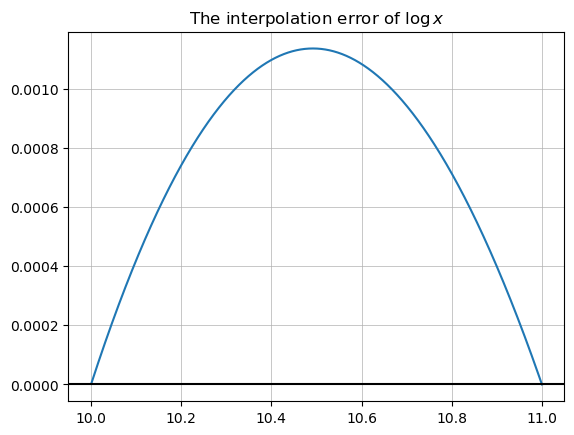

In [11]:
f = np.log
x = np.linspace(10, 11, 5000)[2:]
y = f(x)
# lerp_y = linear_interpolate(f, 10, 11, x)
error_y = interpolation_error(f, 10, 11, x)

plt.plot(x, error_y)

plt.xlim(9.95)
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid(True, which='both', linestyle='-', linewidth=0.5)

plt.title(r"The interpolation error of $\log x$")

plt.show()
plt.clf()
plt.close()

In [12]:
e1 = interpolation_error(np.log, 10, 11, 10.2)
e2 = interpolation_error(np.log, 10, 11, 10.8)

print(f"The error at 10.2 is {e1} and the error at 10.8 is {e2}")

The error at 10.2 is 0.0007405913353144555 and the error at 10.8 is 0.0007128972926682131


### Q8 (d)

Estimate the maximum absolute error $$\large \max_{x \in [x_0, x_1]} |e(x)|$$ of the linear interpolant. Do so for the function $f(x) = \dfrac{1}{1 + x^2}$ with nodes $x_0 = 0$ and $x_1 = h$, by first setting $h=1$. Approximate the maximum error numerically by computing the error for at least 100 equally spaced gridpoints between $x_0$ and $x_1$ to search for its largest absolute value at these points. Implement this procedure in a function `max_error(f, x_0, x_1)`. How large is the maximum absolute error for the above function and nodes?

Now, compute and plot this maximum absolute error for various $h$ given by the formula $h = 2^{-k}$ for $k \in \{0, 1, \dotsc, 10\}$. Plot the maximum absolute error for each of these $h$ as a function of $h$ on a log-log scale. What do you observe and how do you interpret this result?

Plot for comparison, into the same plot, the function $g(h) = h^\gamma$, and try to find a $\gamma$ for which the decay rate matches the rate of the absolute error (such that the lines appear mostly parallel). What $\gamma$ do you obtain and what does this mean for the *scaling* of the error?

In [13]:
# TODO

# Question 9

In this question, we want to write perform Lagrange interpolation on a generic function.

### Q9 (a)

First, write a function `lagrange(k, x, nodes)` that computes the $k$th Lagrange polynomial for the nodes in the array `nodes` and evaluates it at a point $x$, given by the formula $$\large L_k(x) = \prod_{j \ne k}^m \frac{x - x_j}{x_k - x_j}.$$ Make sure that this function can operate on an array `x`.

Using this function, plot all 5 Lagrange polynomials $L_k(x), k \in \{0, \dotsc, 4\}$ for `nodes = [0, 1, 2, 3, 4]` on the interval $x \in [0, 4]$. Do the same for all 11 Lagrange polynomials for `nodes = np.arange(11)` on the interval $x \in [0, 10]$.

In [14]:
def lagrange(k, x, nodes):
    assert type(x) == np.ndarray, "x must be a NumPy array"
    assert type(nodes) == np.ndarray, "nodes must be a NumPy array"
    
    # Filter k out of our list of 0 to m
    # Do this with NumPy because a Python for-loop is needlessly inefficient
    all_j = np.arange(0, len(nodes))
    j = all_j[all_j != k]

    # This is x_k - x_j
    denom = nodes[k] - nodes[j]

    # We expect `x` to be a NumPy array, so we map over all the elements `x_` in the array `x`.
    # For each `x_`, `(x_ - nodes[j]) / denom` is an array of all the fractions that we want to
    # multiply together, so we pass it to np.multiply.reduce to do it efficiently. Once the map
    # is done, we just convert it back into NumPy land and return it
    return np.array(list(
        map(lambda x_: np.multiply.reduce((x_ - nodes[j]) / denom), x)
    ))

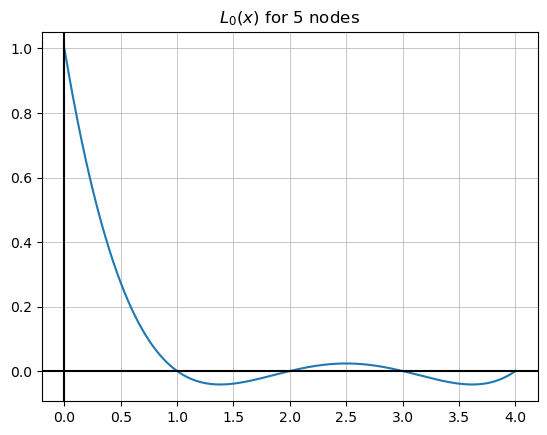

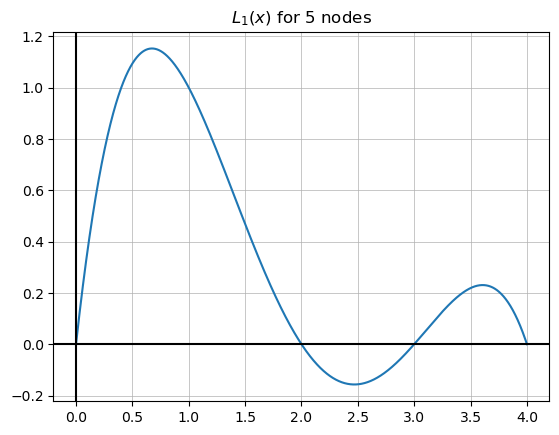

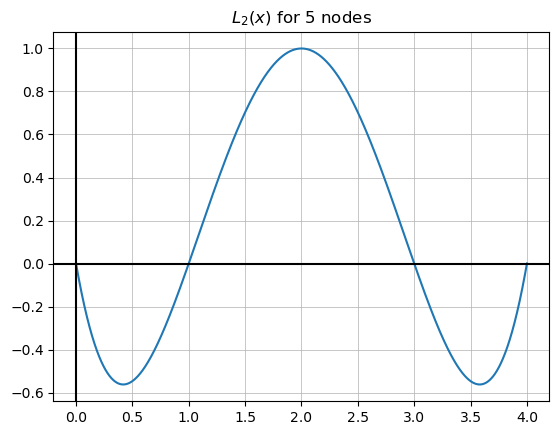

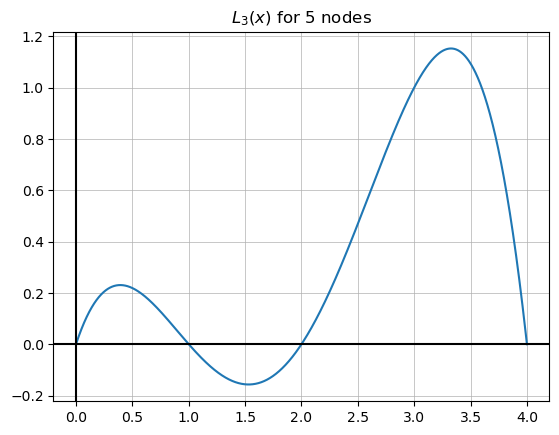

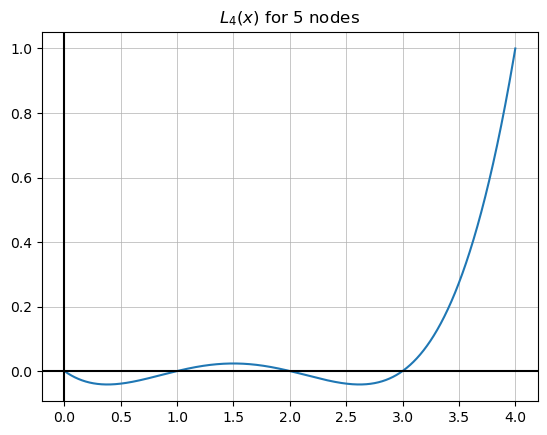

In [15]:
def plot_lagrange(k, x, nodes) -> None:
    y = lagrange(k, x, nodes)

    plt.plot(x, y)

    plt.axhline(0, color="black")
    plt.axvline(0, color="black")
    plt.grid(True, which='both', linestyle='-', linewidth=0.5)
    
    plt.title(f"$L_{k}(x)$ for {len(nodes)} nodes")

    plt.show()
    plt.clf()
    plt.close()


x = np.linspace(0, 4, 10_000)
nodes = np.arange(5)

for k in range(5):
    plot_lagrange(k, x, nodes)

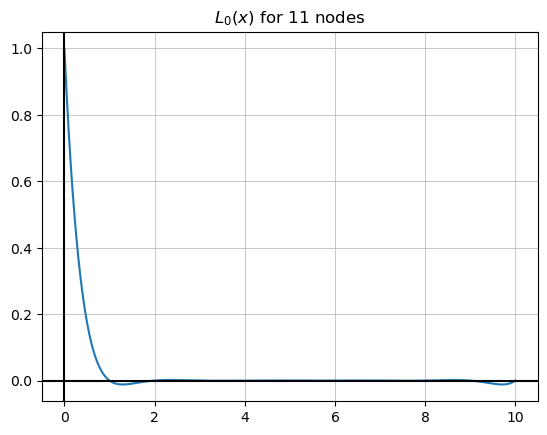

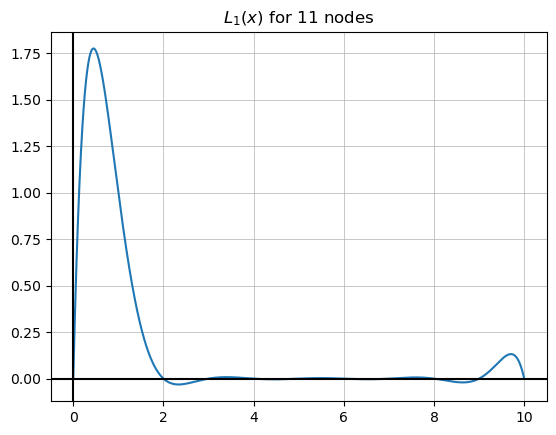

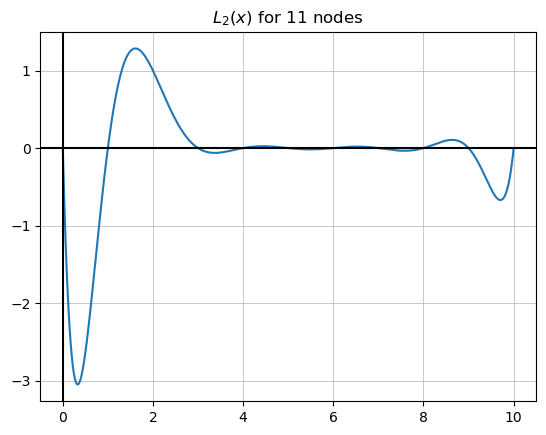

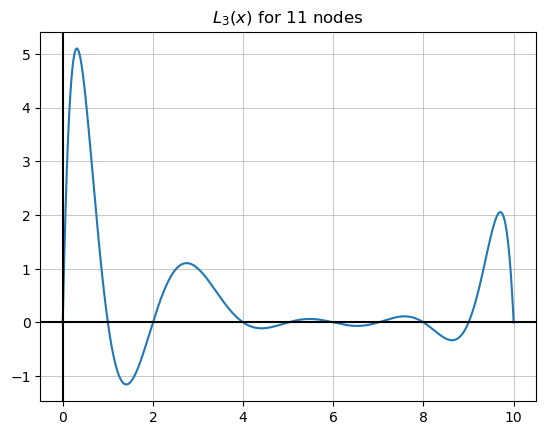

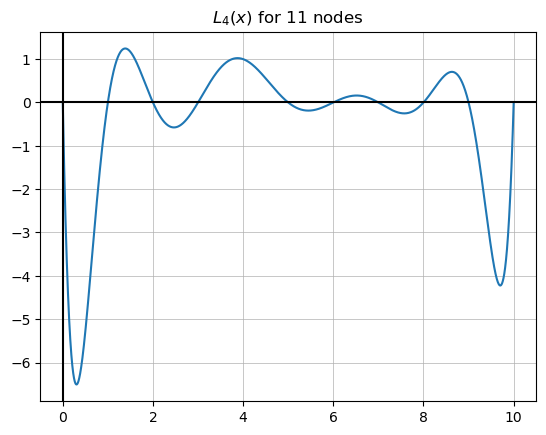

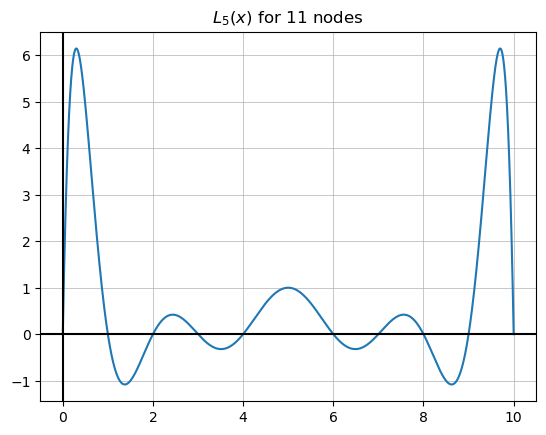

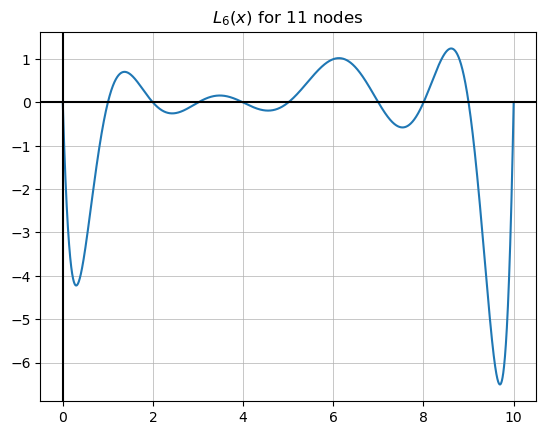

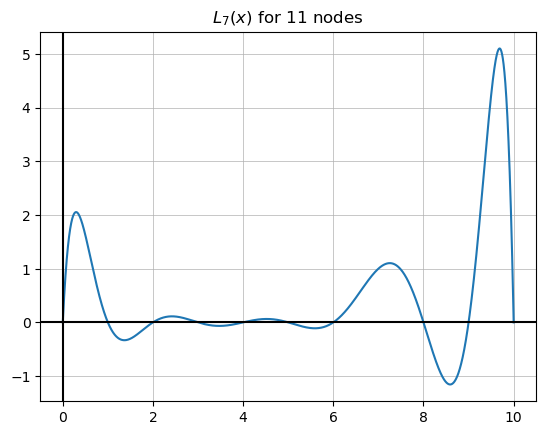

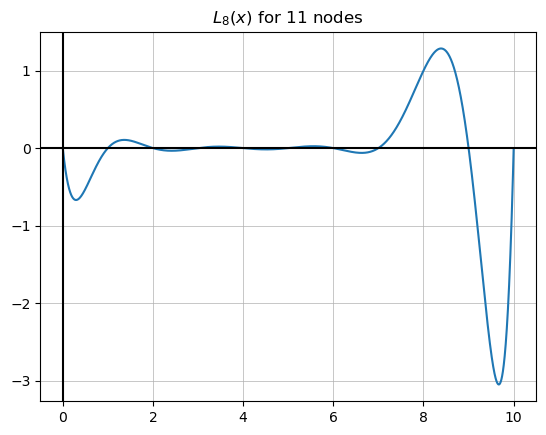

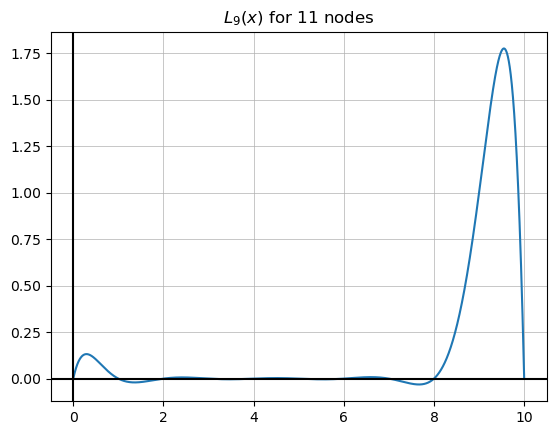

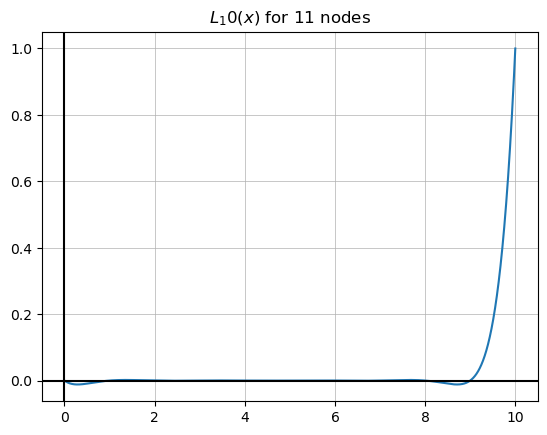

In [16]:
x = np.linspace(0, 10, 25_000)
nodes = np.arange(11)

for k in range(11):
    plot_lagrange(k, x, nodes)

### Q9 (b)

Using the above function, write a function `lagrange_interp`, which returns the value of the Lagrange interpolation $$\large p_m(x) = \sum_{k=0}^m y_k L_k(x).$$ Make sure this function can take an array for `x`.

Use this to make the following plots: For $m$ equally spaces nodes on the interval $[-5, 5]$, plot the $m$th Lagrange interpolaton of $f(x) = \dfrac{1}{1 + x^2}$ against $x \in [-5, 5]$, and plot $f(x)$ itself for comparison. Do so in four plots for $m = 3, 5, 11, 21$. What do you observe, and what kind of phenomenon is this?

What are the values of each of these interpolants at $x = 1$ and at $x = 4.5$ in comparison to the actual value of the function? Comment on your results. How do your observations relate to the Weierstraß theorem?

In [17]:
def lagrange_interp(x, nodes, values):
    # Like before, we're mapping over each k = 0, ..., m and summing them with np.add.reduce
    return np.add.reduce(list(
        map(lambda k: values[k] * lagrange(k, x, nodes), np.arange(len(nodes)))
    ))

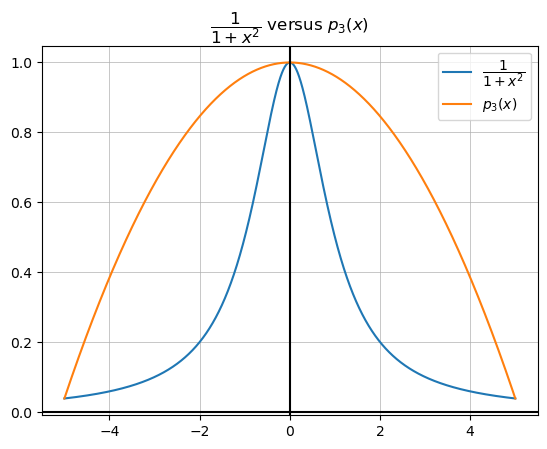

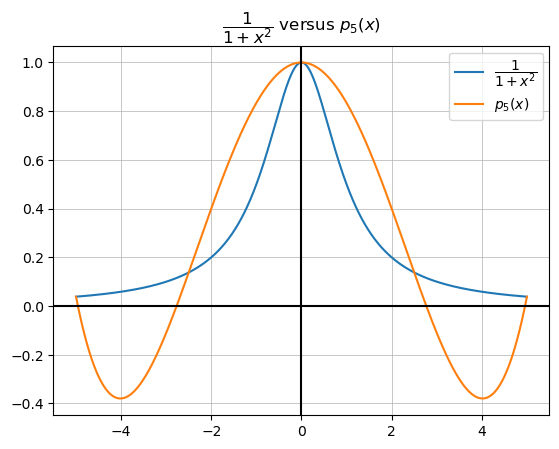

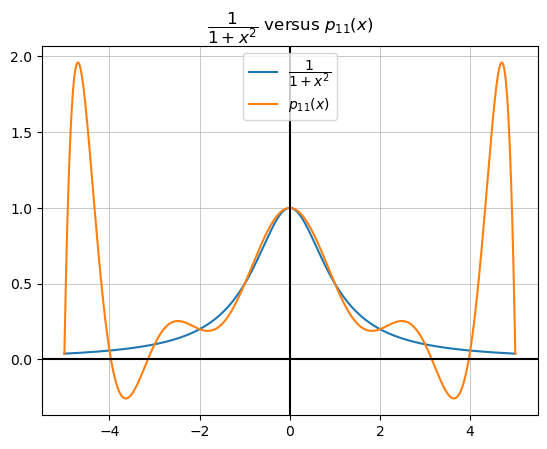

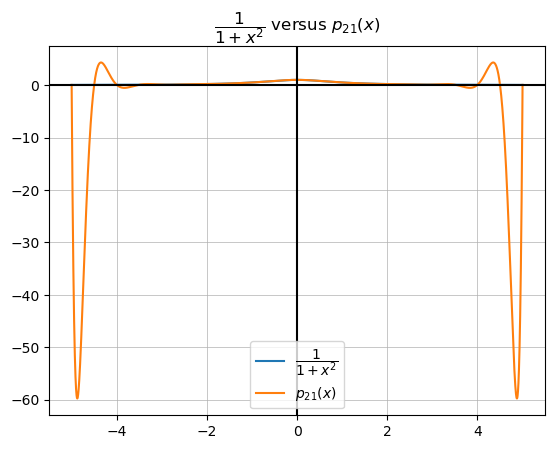

In [18]:
def plot_lagrange_interp(m) -> None:
    x = np.linspace(-5, 5, 25_000)
    f = lambda x: 1 / (1 + x*x)
    y = f(x)
    nodes = np.linspace(-5, 5, m)
    interp_y = lagrange_interp(x, nodes, f(nodes))

    plt.plot(x, y, label=r"$\dfrac{1}{1 + x^2}$")
    plt.plot(x, interp_y, label=f"$p_{{{m}}}(x)$")

    plt.axhline(0, color="black")
    plt.axvline(0, color="black")
    plt.grid(True, which='both', linestyle='-', linewidth=0.5)
    
    plt.title(r"$\dfrac{1}{1 + x^2}$ versus " + f"$p_{{{m}}}(x)$")
    plt.legend()

    plt.show()
    plt.clf()
    plt.close()


for m in (3, 5, 11, 21):
    plot_lagrange_interp(m)

We observe that as $m$ increases, the interpolation seems to get better but as becomes large, the error increases dramatically and creates spikes. This is called the *Runge phenomenon*.

In [19]:
f = lambda x: 1 / (1 + x*x)

print(f"f(1) = {f(1)} and f(4.5) = {f(4.5)}")

for m in (3, 5, 11, 21):
    nodes = np.linspace(-5, 5, m)
    interp_y = lagrange_interp(np.array([1, 4.5]), nodes, f(nodes))
    print(f"p_{m}(1) = {interp_y[0]} and p_{m}(4.5) = {interp_y[1]}")

f(1) = 0.5 and f(4.5) = 0.047058823529411764
p_3(1) = 0.9615384615384615 and p_3(4.5) = 0.22115384615384615
p_5(1) = 0.8342175066312998 and p_5(4.5) = -0.2891246684350133
p_11(1) = 0.5 and p_11(4.5) = 1.578720990349265
p_21(1) = 0.5 and p_21(4.5) = 0.047058823529411764


It looks like $p_3$ and $p_5$ are both bad approximations for the points $x=1$ and $x=4.5$. But $p_{11}$ and $p_{21}$ are perfect approximations for $x=1$. Likewise, $p_{11}$ is a bad approximation for $x=4.5$ but $p_{21}$ is a perfect approximation.

The Weierstraß theorem says that continuous functions can be approximated by polynomials arbitrarily well. Our results here agree with the theorem, since it would appear that the error goes to zero as $m \to \infty$.